In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [2]:
from pathlib import Path

from PIL import Image

from segmenter_api.di import resolve
from segmenter_api.domain.factory.detector_factory import (
    DetectorType,
)
from segmenter_api.domain.factory.segmenter_factory import (
    SegmenterType,
)
from segmenter_api.usecase.service.text2segment import (
    Text2SegmentInput,
    Text2SegmentUsecase,
)

In [3]:
image_path = Path("tests/data/abema_water.png")
image = Image.open(image_path)

In [4]:
text2segment_usecase = resolve(Text2SegmentUsecase)

In [5]:
segment_output = text2segment_usecase.text2segment(
    text2segment_input=Text2SegmentInput(
        texts=["plastic bottle", "green character"],
        image=image,
        detector_type=DetectorType.FLORENCE2,
        segmenter_type=SegmenterType.SAM2,
    )
)

{"severity": "INFO", "timestamp": "2025-04-11_10:15:26", "message": "関数Text2SegmentUsecase.text2segmentが開始"}
{"severity": "INFO", "timestamp": "2025-04-11_10:15:26", "message": "関数Florence2Detector.__init__が開始"}


/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/.venv/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Some weights of Florence2ForConditionalGeneration were not initialized from the model checkpoint at models/microsoft/Florence-2-large and are newly initialized: ['language_model.lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{"severity": "INFO", "timestamp": "2025-04-11_10:15:31", "message": "関数Florence2Detector.__init__は4.4492secで処理を完了"}
{"severity": "INFO", "timestamp": "2025-04-11_10:15:31", "message": "関数SAM2.__init__が開始"}


MissingConfigException: Cannot find primary config 'models/facebook/sam2.1-hiera-large/sam2.1_hiera_l.yaml'. Check that it's in your config search path.

Config search path:
	provider=hydra, path=pkg://hydra.conf
	provider=main, path=pkg://sam2
	provider=schema, path=structured://

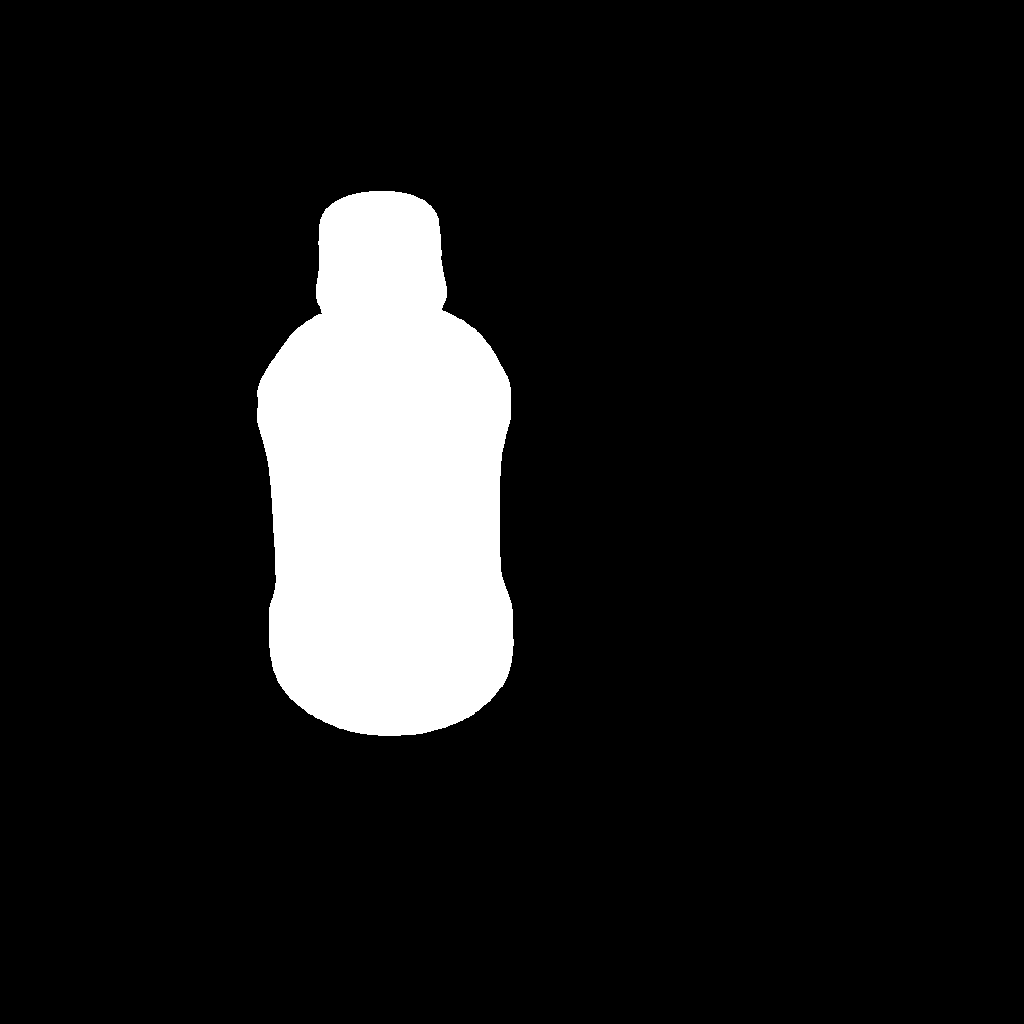

In [9]:
segment_output.masks[0]

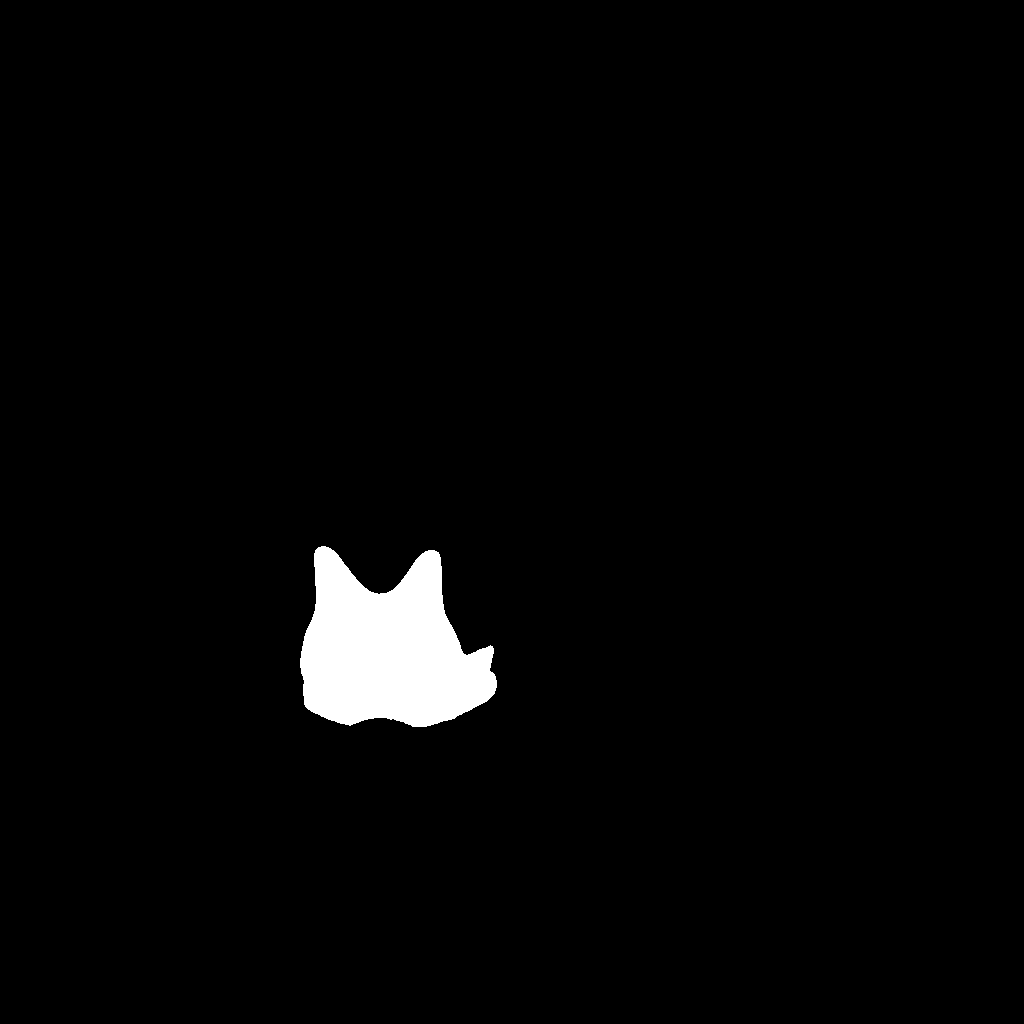

In [8]:
segment_output.masks[1]